In [1]:
#Importing Modules used for the Data Cleaning & Model Building
import pandas as pd
import numpy as np
import os
import random
from matplotlib import pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import pylab
from matplotlib.path import Path

In [2]:
import tensorflow as tf
import keras

In [3]:
#Initialize the path for the files to be pulled from and also the desired columns
path = "Hemorrhage Segmentation Project"
file_list = os.listdir(path)
file_list.remove('Segmentation Glossary (1).rtf')
file_list.remove('flagged.txt')
file_list.remove('hemorrhage-labels.csv')
file_list.remove('.ipynb_checkpoints')
column_names = ["Origin","Labeling State","All Labels","Correct Label","Type"]
df_raw = pd.DataFrame(columns=column_names)

#This Loop opens each file in the directory and creates a combined dataframe with the file names and type for each segmented file
for file in file_list:
    cols = column_names[:4]
    df_temp = pd.read_csv(path + "/" + file)
    df_temp = df_temp[cols]
    df_temp["Type"] = file.strip().split()[0].replace("Results_","")
    df_temp
    df_raw = df_raw.append(df_temp)

#Remove abnormalilites from the Correct Label section
df = df_raw[df_raw["Labeling State"] == "Labeled"].dropna().reset_index().drop(['index'],axis = 1)
df['Valid'] = df['Correct Label'].apply(lambda x: 1 if "x" in x else 0)
df = df[df.Valid == 1].reset_index().drop(["index","Valid"],axis = 1)
df

/var/folders/6g/lht9tm8x1bz3sdrs0xk_d2m00000gn/T/ipykernel_41452/2918422166.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(df_temp)
/var/folders/6g/lht9tm8x1bz3sdrs0xk_d2m00000gn/T/ipykernel_41452/2918422166.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(df_temp)
/var/folders/6g/lht9tm8x1bz3sdrs0xk_d2m00000gn/T/ipykernel_41452/2918422166.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(df_temp)
/var/folders/6g/lht9tm8x1bz3sdrs0xk_d2m00000gn/T/ipykernel_41452/2918422166.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(df_temp)


,Origin,Labeling State,All Labels,Correct Label,Type
0,ID_0061cb462.jpg,Labeled,"['[{""x"": 0.4823523, ""y"": 0.59177}, {""x"": 0.473...","[[{'x': 0.40625, 'y': 0.330078125}, {'x': 0.40...",Subdural
1,ID_0061cb462.jpg,Labeled,"['[{""x"": 0.4823523, ""y"": 0.59177}, {""x"": 0.473...","[[{'x': 0.40625, 'y': 0.330078125}, {'x': 0.40...",Subdural
2,ID_00eb6f7cc.jpg,Labeled,"['[{""x"": 0.48163298, ""y"": 0.71568763}, {""x"": 0...","[[{'x': 0.447265625, 'y': 0.73828125}, {'x': 0...",Subdural
3,ID_0162f0acb.jpg,Labeled,"['[{""x"": 0.44486272, ""y"": 0.4724329}, {""x"": 0....","[[{'x': 0.46875, 'y': 0.79296875}, {'x': 0.468...",Subdural
4,ID_029b94665.jpg,Labeled,"['[{""x"": 0.7883911, ""y"": 0.4989282}, {""x"": 0.7...","[[{'x': 0.55859375, 'y': 0.32421875}, {'x': 0....",Subdural
...,...,...,...,...,...
2265,ID_fd00a35c4.jpg,Labeled,"['[{""x"": 0.4840052, ""y"": 0.84592354}, {""x"": 0....","[[{'x': 0.486328125, 'y': 0.853515625}, {'x': ...",Subarachnoid
2266,ID_fd9d0585f.jpg,Labeled,"['[{""x"": 0.30013344, ""y"": 0.61019367}, {""x"": 0...","[[{'x': 0.3515625, 'y': 0.73046875}, {'x': 0.3...",Subarachnoid
2267,ID_ff5864651.jpg,Labeled,"['[{""x"": 0.5059423, ""y"": 0.78387815}, {""x"": 0....","[[{'x': 0.513671875, 'y': 0.783203125}, {'x': ...",Subarachnoid
2268,ID_ffc54be74.jpg,Labeled,"['[{""x"": 0.60182124, ""y"": 0.6626198}, {""x"": 0....","[[{'x': 0.287109375, 'y': 0.443359375}, {'x': ...",Subarachnoid


In [4]:
#Assemble a random sample of normal images to to add to the training list
N = 5000
path_n = 'normal/max_contrast_window'
file_list_n = os.listdir(path_n)

random.seed(123) #Keeps random state the same while we are testing 
normal_files = random.sample(file_list_n,k = N)

#Format df same as the other data frame so we can easily append it
df_normal = pd.DataFrame(normal_files,columns= ['Origin'])
df_normal["Labeling State"] = "None"
df_normal["All Labels"] = "None"
df_normal["Correct Label"] = "None"
df_normal["Type"] = "Normal"

#Append this Normal File df to the original df
df = df.append(df_normal).reset_index().drop(["index"],axis = 1)
df = df[df['Origin']!='.ipynb_checkpoints']
df

/var/folders/6g/lht9tm8x1bz3sdrs0xk_d2m00000gn/T/ipykernel_41452/2918040486.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_normal).reset_index().drop(["index"],axis = 1)


,Origin,Labeling State,All Labels,Correct Label,Type
0,ID_0061cb462.jpg,Labeled,"['[{""x"": 0.4823523, ""y"": 0.59177}, {""x"": 0.473...","[[{'x': 0.40625, 'y': 0.330078125}, {'x': 0.40...",Subdural
1,ID_0061cb462.jpg,Labeled,"['[{""x"": 0.4823523, ""y"": 0.59177}, {""x"": 0.473...","[[{'x': 0.40625, 'y': 0.330078125}, {'x': 0.40...",Subdural
2,ID_00eb6f7cc.jpg,Labeled,"['[{""x"": 0.48163298, ""y"": 0.71568763}, {""x"": 0...","[[{'x': 0.447265625, 'y': 0.73828125}, {'x': 0...",Subdural
3,ID_0162f0acb.jpg,Labeled,"['[{""x"": 0.44486272, ""y"": 0.4724329}, {""x"": 0....","[[{'x': 0.46875, 'y': 0.79296875}, {'x': 0.468...",Subdural
4,ID_029b94665.jpg,Labeled,"['[{""x"": 0.7883911, ""y"": 0.4989282}, {""x"": 0.7...","[[{'x': 0.55859375, 'y': 0.32421875}, {'x': 0....",Subdural
...,...,...,...,...,...
7265,ID_00f75c05a.jpg,None,None,None,Normal
7266,ID_0247a8b08.jpg,None,None,None,Normal
7267,ID_03598c68f.jpg,None,None,None,Normal
7268,ID_02bd91941.jpg,None,None,None,Normal


In [9]:
# get list of shapes (in form of list of coordinates) for each image, from the 'Correct Label' column 

file_dir = 'relevant_images/'

x_lists=[]
y_lists=[]
img_list=[]

for i, file_name in enumerate(df.Origin[:10]):
    img = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2)#.reshape(-1)
    img_list.append(img)
    points = df.loc[i,'Correct Label']
    x_list=[]
    y_list=[]
    shapes = points.split('[')[2:]
    for shape in shapes:
        pairs = shape.split('{')[1:]
        pairs_c = []
        for pair in pairs:
            pair_c = pair[:-3].replace('}', "")
            pairs_c.append(pair_c) 
            x_list_s = []
            y_list_s = []
            for p in pairs_c:
                x = float(p.split(',')[0][5:])
                y = float(p.split(',')[1][6:])
                #coord_list.append([x,y])
                x_list_s.append(x)
                y_list_s.append(y)
        x_list.append(x_list_s)
        y_list.append(y_list_s)
    x_lists.append(x_list)
    y_lists.append(y_list)

/var/folders/6g/lht9tm8x1bz3sdrs0xk_d2m00000gn/T/ipykernel_41452/3744397473.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for i, file_name in enumerate(df.Origin[:10]):


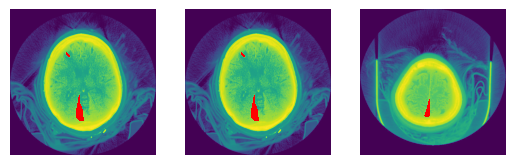

In [10]:
# Plot some example images of hemorrhaging regions, in red 
for num, x in enumerate(img_list[:3]):
    plt.subplot(1,3,num+1)
    plt.axis('off')
    implot = plt.imshow(img_list[num], extent = [0,1,1,0])
    for i in range(len(x_lists[num])):
        plt.fill(x_lists[num][i], y_lists[num][i], 'r')
        
plt.show()

In [11]:
# create masks of all hemorrhage polygons
masks = []
for j in range(len(x_lists)):
    coords_list = []
    for k in range(len(x_lists[j])):
        x_list_new = [i * 1000 for i in x_lists[j][k]]
        y_list_new = [i * 1000 for i in y_lists[j][k]]
        coords = list(zip(y_list_new,x_list_new))
        coords_list.append(coords)

    polygons = []
    for c in coords_list:
        polygon= c
        poly_path=Path(polygon)
        polygons.append(poly_path)

    x, y = np.mgrid[:1000, :1000]
    coors=np.hstack((x.reshape(-1, 1), y.reshape(-1,1)))

    # dark = FALSE
    mask = np.full((1000000,), False)
    for p in polygons:
        mask = mask + p.contains_points(coors)
    masks.append(mask)

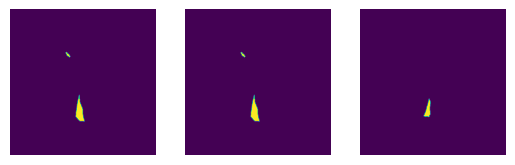

In [12]:
# view some example masks - dark=FALSE (non hemorrhage region), light=TRUE (hemorrhaging region)
for num, x in enumerate(masks[:3]):
    plt.subplot(1,3,num+1)
    plt.axis('off')
    implot = plt.imshow(masks[num].reshape(1000, 1000), extent = [0,1,1,0])
        
plt.show()